In [1]:
#setting up paths, folder & file structures

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
#downloading TF models from tensorflow zoo and installing tensorflow object detection 

In [6]:
#!pip install wget
import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [10]:
#install protocolbuffers
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
wget.download(url)
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
#install TFOD
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
listing git files failed - pretending there aren't any
error: Setup script exited with error: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/


copying object_detection\configs\tf2\faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8.config -> build\lib\object_detection\configs\tf2
copying object_detection\configs\tf2\faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.config -> build\lib\object_detection\configs\tf2
copying object_detection\configs\tf2\faster_rcnn_resnet101_v1_800x1333_coco17_gpu-8.config -> build\lib\object_detection\configs\tf2
copying object_detection\configs\tf2\faster_rcnn_resnet152_v1_1024x1024_coco17_tpu-8.config -> build\lib\object_detection\configs\tf2
copying object_detection\configs\tf2\faster_rcnn_resnet152_v1_640x640_coco17_tpu-8.config -> build\lib\object_detection\configs\tf2
copying object_detection\configs\tf2\faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.config -> build\lib\object_detection\configs\tf2
copying object_detection\configs\tf2\faster_rcnn_resnet50_v1_1024x1024_coco17_tpu-8.config -> build\lib\object_detection\configs\tf2
copying object_detection\configs\tf2\faster_rcnn_resnet50_v1_640x640_

In [11]:
!pip list

Package                      Version   Editable project location
---------------------------- --------- ---------------------------------------
absl-py                      1.0.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   4.2.4
certifi                      2021.10.8
charset-normalizer           2.0.7
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.0
entrypoints                  0.3
flatbuffers                  2.0
fonttools                    4.28.1
gast                         0.4.0
google-auth                  2.3.3
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.42.0
h5py                         3.6.0
idna                         3.3
importlib-metadata           4.8.2
ipykernel                    6.5.1
ipython                      7.29.0
jedi                         0.18.1
jupyter-clien

In [12]:
#check for missing libraries
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-12-28 23:02:01.896104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-28 23:02:01.905597: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-28 23:03:10.006691: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-12-28 23:03:10.020262: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-28 23:03:10.051563: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: HP-LAPTOP
2021-12-28 23:03:10.052248: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: HP-LAPTOP
Running tests under Python 3.8.8: F:\ANPR\anprsys\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_cent

In [13]:
!pip install tensorflow tensorflow-gpu --upgrade

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib

In [ ]:
pip install pyyaml

In [8]:
import object_detection

In [ ]:
!pip list

In [9]:
#getting ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz from TF model zoo and unpacking it
wget.download(PRETRAINED_MODEL_URL)
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [9]:
#creating label map... label name refers to object name in annotation xml file 
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [10]:
#Create TF records
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [11]:
#!pip install pytz

In [12]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [13]:
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [14]:
#Updating model config file

import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [15]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [16]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [17]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [18]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [19]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [29]:
#Training the model
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [23]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [24]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [20]:
#Testing model
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [21]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [22]:
#Detect from image
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [269]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], '1.jpg')

In [270]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)


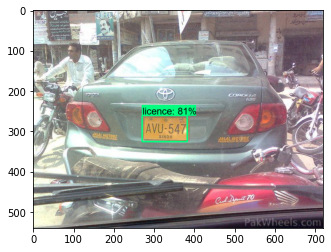

In [271]:

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [172]:
#OCR on detection

In [173]:
#!pip install easyocr

In [98]:
import easyocr

In [99]:
detection_threshold = 0.5

In [100]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

In [272]:
image = image_np_with_detections
scores = list(filter(lambda x: x>detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [273]:
detections['detection_scores']

array([0.805455  , 0.13361165, 0.07195768, 0.07114419, 0.07050896,
       0.05241525, 0.04993585, 0.04987276, 0.04135865, 0.04013711,
       0.03996101, 0.03826442, 0.03757253, 0.03651145, 0.03642955,
       0.03634733, 0.03631443, 0.03474349, 0.03467   , 0.0345026 ,
       0.03353125, 0.03170896, 0.03151387, 0.03111228, 0.03055474,
       0.03049025, 0.03046811, 0.03037104, 0.03025463, 0.02932367,
       0.02894908, 0.02885008, 0.02875352, 0.02800429, 0.02688968,
       0.02655816, 0.02622774, 0.02593058, 0.02586541, 0.02568147,
       0.02534434, 0.02422675, 0.02403513, 0.02363062, 0.02326003,
       0.02321953, 0.02320689, 0.02282646, 0.02238828, 0.02227914,
       0.02205154, 0.02195671, 0.02193332, 0.02187008, 0.02179596,
       0.02159575, 0.02101374, 0.02099794, 0.02067783, 0.02063823,
       0.02054644, 0.02039269, 0.02028269, 0.01981932, 0.01943022,
       0.0192014 , 0.01907918, 0.0189476 , 0.01892969, 0.01862347,
       0.01857638, 0.01850951, 0.01842111, 0.018222  , 0.01815

In [274]:
detections['detection_scores'] > detection_threshold

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [275]:
scores

[0.805455]

In [276]:
width = image.shape[1]
height = image.shape[0]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.48504612 0.3761438  0.6020825  0.5329581 ]
[261.92490399 270.82354546 325.1245451  383.72982502]


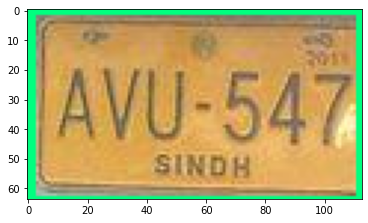

In [277]:
#applying ROI filtering and ocr
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3]),]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [278]:
for result in ocr_result:
    print(result)

([[7, 15], [113, 15], [113, 51], [7, 51]], 'AVU-547', 0.9805351131169888)
([[41, 47], [79, 47], [79, 59], [41, 59]], 'sindk', 0.1715015540940102)


In [279]:
#OCR region filtering

In [280]:
region_threshold = 0.05
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = []
    
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height/rectangle_size>region_threshold:
            plate.append(result[1])
        
        print(length, width)
    return plate

In [281]:
filter_text(region, ocr_result, region_threshold)

106 720
38 720


['AVU-547', 'sindk']

In [282]:
#OCR and filtering

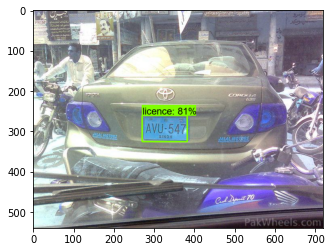

In [283]:
plt.imshow(image_np_with_detections)

In [284]:
def ocr(image, detections, detection_threshold, region_threshold):
    scores = list(filter(lambda x: x>detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    width = image.shape[1]
    height = image.shape[0]
    
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3]),]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        print(text)
        return text, region

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


106 720
38 720
['AVU-547', 'sindk']


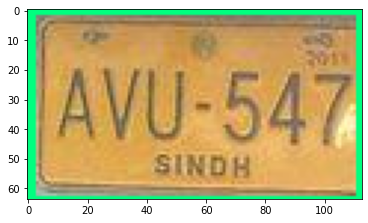

In [285]:
text, region = ocr(image_np_with_detections, detections, detection_threshold, region_threshold)

In [ ]:
#save results

In [240]:
import csv
import uuid

In [246]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a',newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [286]:
save_results(text, region, 'detection_results.csv', 'Detection_Images')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]
90 640
['AVE 068']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


88 640
['AvE-06 8']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


40 640
48.52178337433169 640
['AVE', '5068']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


84 640
['AvE-068']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


84 640
['AVE-06 8']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


82 640
['AVE-068']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


78 640
['AVE-068']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


78 640
['AVE: 068']
78 640
['AVE:068']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


40 640
54 640
['LeC', 'B378']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


54 640
52 640
['LEC .', '3378']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


116 640
112.41417428226057 640
['AVE -', '06 8}']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


100 640
100 640
['AVE', '06 8']
210 640
['AVE- 06 8']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


124 640
['SP5184']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


120 640
['SP5184']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


106 640
['SP518']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


118 640
['SP5184']
123 640
['SP.5184']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


112 640
['SP-5j04|']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


145.7052112202799 640
['SP-5194']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


127 640
['SP.5194']
124 640
['SP-5194']


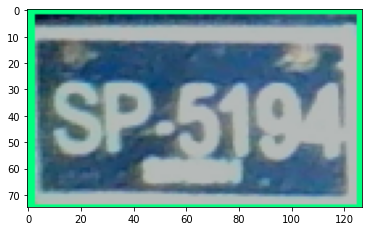

In [68]:
#detect from video
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    try:
        text, region = ocr(image_np_with_detections, detections, detection_threshold, region_threshold)
    except:
        pass
        
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break